<a href="https://colab.research.google.com/github/ZofiaLandowska/notes/blob/main/notebook6_landowska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name: Zofia Landowska 

Date: 4/25/2023

## Problem Description:
The goal of this project is to build a convolutional neural network that will diagnose pneumonia based on chest X-ray images. I will try to build a model thet can accurately classify chest X-ray images as either having pneumonia or not having pneumonia.

### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [4]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5416 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
# Build your CNN here

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])



In [6]:
training_results = model.fit_generator(
        train_data,
        steps_per_epoch = len(train_data), 
        epochs=8,
        validation_data = test_data,
        validation_steps = len(test_data)
        )

<ipython-input-6-6bcfb9822f05>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model.fit_generator(


Epoch 1/8
170/170 [==============================] - 162s 857ms/step - loss: 0.3719 - accuracy: 0.8370 - val_loss: 0.9430 - val_accuracy: 0.6635
Epoch 2/8
170/170 [==============================] - 18s 107ms/step - loss: 0.1964 - accuracy: 0.9206 - val_loss: 0.9139 - val_accuracy: 0.7131
Epoch 3/8
170/170 [==============================] - 18s 107ms/step - loss: 0.1437 - accuracy: 0.9417 - val_loss: 1.0992 - val_accuracy: 0.6923
Epoch 4/8
170/170 [==============================] - 20s 115ms/step - loss: 0.1255 - accuracy: 0.9529 - val_loss: 0.5071 - val_accuracy: 0.7997
Epoch 5/8
170/170 [==============================] - 18s 107ms/step - loss: 0.1217 - accuracy: 0.9525 - val_loss: 0.5639 - val_accuracy: 0.7901
Epoch 6/8
170/170 [==============================] - 18s 108ms/step - loss: 0.1304 - accuracy: 0.9513 - val_loss: 1.1551 - val_accuracy: 0.7003
Epoch 7/8
170/170 [==============================] - 19s 112ms/step - loss: 0.1131 - accuracy: 0.9570 - val_loss: 1.3501 - val_accuracy

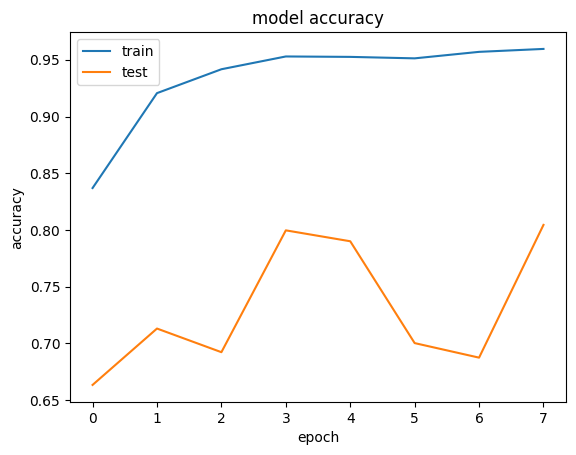

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/8


<ipython-input-8-5448d1c0b8c2>:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model.fit_generator(


170/170 [==============================] - 22s 116ms/step - loss: 0.4997 - accuracy: 0.7657 - val_loss: 0.4153 - val_accuracy: 0.8285
Epoch 2/8
170/170 [==============================] - 19s 109ms/step - loss: 0.2371 - accuracy: 0.9081 - val_loss: 0.5269 - val_accuracy: 0.7724
Epoch 3/8
170/170 [==============================] - 20s 116ms/step - loss: 0.1718 - accuracy: 0.9339 - val_loss: 0.5445 - val_accuracy: 0.7740
Epoch 4/8
170/170 [==============================] - 18s 107ms/step - loss: 0.1528 - accuracy: 0.9389 - val_loss: 0.6090 - val_accuracy: 0.7692
Epoch 5/8
170/170 [==============================] - 20s 116ms/step - loss: 0.1337 - accuracy: 0.9461 - val_loss: 0.7118 - val_accuracy: 0.7660
Epoch 6/8
170/170 [==============================] - 19s 109ms/step - loss: 0.1324 - accuracy: 0.9496 - val_loss: 0.6867 - val_accuracy: 0.7724
Epoch 7/8
170/170 [==============================] - 19s 111ms/step - loss: 0.1292 - accuracy: 0.9529 - val_loss: 0.8745 - val_accuracy: 0.7196
Ep

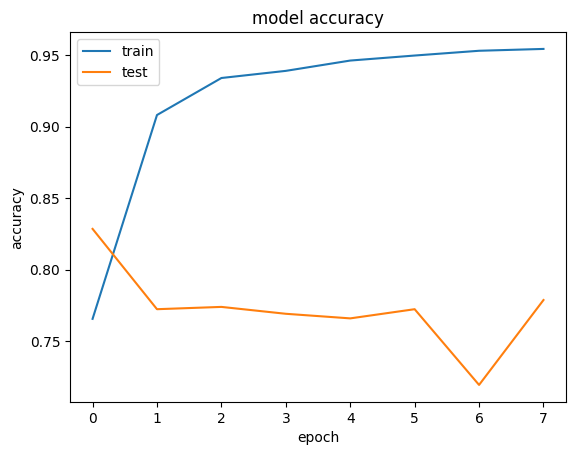

In [8]:
# Build your tuned CNN here

model = Sequential()
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

training_results = model.fit_generator(
        train_data,
        steps_per_epoch = len(train_data), 
        epochs=8,
        validation_data = test_data,
        validation_steps = len(test_data)
        )

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()